In [1]:
import random
import networkx as nx
from matplotlib import pyplot as plt
from collections import Counter
import math
from utils.plotTools import plot_qwak
import os
import ast

def random_walk(graph, start_node, num_steps=10, num_walks=1):
    walks = []
    for _ in range(num_walks):
        walk = [start_node]
        for _ in range(num_steps):
            neighbors = list(nx.neighbors(graph, walk[-1]))
            if neighbors:
                next_node = random.choice(neighbors)
                walk.append(next_node)
            else:
                break
        walks.append(walk)
    return walks


def walks_to_frequency(graph, walks):
    # Concatenate all the walks into a single list
    all_walks = [node for walk in walks for node in walk]
    
    # Count the occurrences of each node
    counter = Counter(all_walks)
    
    # Convert the counter to a list of frequencies
    frequency = [0]*len(graph.nodes)
    for node, count in counter.items():
        frequency[node] = count
    return frequency

def frequency_to_probability(frequency):
    total_steps = sum(frequency)
    probability = [f / total_steps for f in frequency]
    return probability



In [2]:
def write_list_to_file(file_path, lst):
    """
    Write a list of elements to a text file.
    
    :param file_path: the file path where to write the list
    :param lst: the list of elements to write
    """
    with open(file_path, 'w') as f:
        for item in lst:
            f.write(f"{item}\n")


def load_list_from_file(file_path):
    """
    Load a list of float elements from a text file.
    
    :param file_path: the file path to load the list from
    :return: the list of float elements loaded from the file
    """
    try:
        with open(file_path, 'r') as f:
            # Read lines and convert each line to a float
            return [float(line.strip()) for line in f.readlines()]
    except ValueError:
        print("Error: could not convert string to list")
        return []
    except FileNotFoundError:
        print("Error: file not found")
        return []
        
def load_or_generate_data(file1, file2, generation_func1, generation_func2, args1=(), kwargs1={}, args2=(), kwargs2={}):
    """
    Load data from files if they exist, or generate data using specified functions.
    
    :param file1: the file path to load the first data from
    :param file2: the file path to load the second data from
    :param generation_func1: the function to generate the first data if the file doesn't exist
    :param generation_func2: the function to generate the second data if the file doesn't exist
    :param args1: tuple containing positional arguments for the first generation function
    :param kwargs1: dict containing keyword arguments for the first generation function
    :param args2: tuple containing positional arguments for the second generation function
    :param kwargs2: dict containing keyword arguments for the second generation function
    :return: a tuple containing the two datasets
    """
    
    if os.path.exists(file1) and os.path.exists(file2):
        data1 = load_list_from_file(file1)
        data2 = load_list_from_file(file2)
        print('Files exist!')
    else:
        print('Files do not exist, generating data...')
        data1 = generation_func1(*args1, **kwargs1)
        data2 = generation_func2(*args2, **kwargs2)
        
        if not os.path.exists(file1):
            write_list_to_file(file1, data1)
            
        if not os.path.exists(file2):
            write_list_to_file(file2, data2)
    
    return data1, data2

In [3]:
n = 200
G = nx.path_graph(n)
start_node = n//2
walk = random_walk(G, start_node, num_steps=200, num_walks=500)
frequency = walks_to_frequency(G, walk)
probability = frequency_to_probability(frequency)


# Cover time

In [4]:
def estimate_cover_time(graph_list, num_simulations=1000):
    cover_times = []

    for graph in graph_list:
        total_steps = 0

        for _ in range(num_simulations):
            visited = set()
            start_node = random.choice(list(graph.nodes))
            current_node = start_node

            while len(visited) < len(graph.nodes):
                visited.add(current_node)
                neighbors = list(nx.neighbors(graph, current_node))
                current_node = random.choice(neighbors)
                total_steps += 1

        # Average the total steps over the number of simulations
        average_cover_time = total_steps / num_simulations
        cover_times.append(average_cover_time)
    return cover_times

## Complete Graph

In [ ]:
def complete_graph_cover_time(n_range):
    cover_times = []
    for n in n_range:
        cover_times.append(n * math.log(n))
    return cover_times

In [5]:
n_range = range(5, 100)
samples = 100
graph_list = [nx.complete_graph(n) for n in n_range]

cover_times_random_walk_complete_file = f'Datasets/DynGraphsDTRW/coverTimeComplete_N{n_range}_S{samples}.txt'
estimate_complete_cover_time_file = f'Datasets/DynGraphsDTRW/estimateCoverTimeComplete_N{n_range}_S{samples}.txt'

if os.path.exists(cover_times_random_walk_complete_file) and os.path.exists(estimate_complete_cover_time_file):
    cover_times_random_walk_complete = load_list_from_file(cover_times_random_walk_complete_file)
    estimate_complete_cover_time = load_list_from_file(estimate_complete_cover_time_file)
    print('File exists!')
else:
    print('File Doesnt Exist!')
    cover_times_random_walk_complete = estimate_cover_time(graph_list, num_simulations=samples)
    estimate_complete_cover_time = complete_graph_cover_time(n_range)
    if not os.path.exists(cover_times_random_walk_complete_file):
        write_list_to_file(cover_times_random_walk_complete_file, [cover_times_random_walk_complete])
    if not os.path.exists(estimate_complete_cover_time_file):
        write_list_to_file(estimate_complete_cover_time_file, [estimate_complete_cover_time])

File Doesnt Exist!


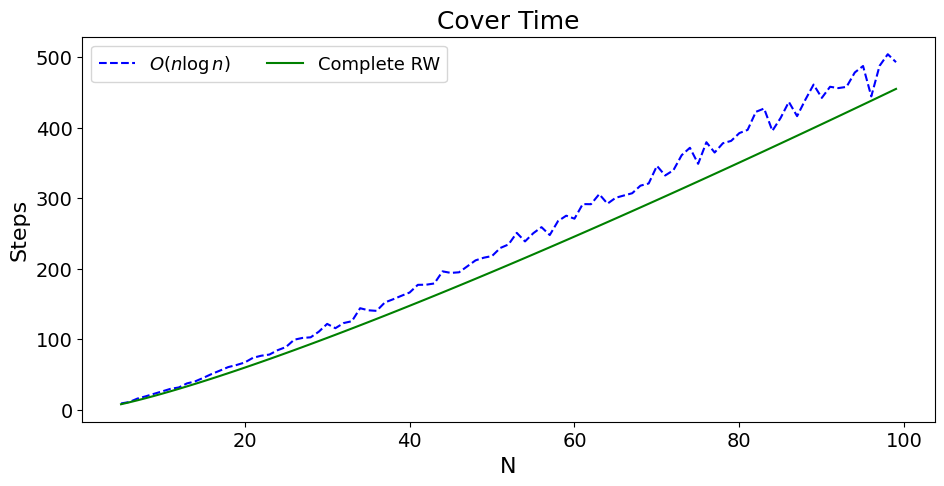

In [6]:
alphaLabelList = [r'$O(n\log n)$',r'Complete RW']

params = {
    'font_size' : 14,
    'figsize': (11, 5),
    'plot_title' : f'Cover Time',
    'x_label' : 'N',
    'y_label' : "Steps",
    'legend_labels' : alphaLabelList,
    'legend_loc': "best",
    # 'legend_title' : r'$\alpha$',
    'legend_ncol' : 3,
    'color_list' : ['#0000FF', '#008000', '#525252'],
    'line_style_list' : ['--', '-','-.' ],
    # 'save_path' : f'Output/OrientedDynamics/orientedDynamics_N{N}_NWALKS{len(alphaList)}_Alphas{str([round(a, 2) for a in alphaList]).replace(", ", "-").replace("[", "").replace("]", "")}_TMAX{round(t)}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 7,
    # 'y_num_ticks' : 7,
    # 'x_round_val' : 1,
    # 'y_round_val' : 3,
}

node_value_matrix = list(range(5,100))
plot_qwak(x_value_matrix = [list(range(5,100)),list(range(5,100))] , y_value_matrix = [cover_times_random_walk_complete,estimate_complete_cover_time],**params)

## Lollipop graph

In [36]:
def lollipop_graph_cover_time(n_range,num_simulations):
    cover_times = []
    for n in n_range:
        cover_times.append(n ** 3)
    print(len(cover_times))
    return cover_times

In [37]:
m_range = range(2, 100)
n_range = range(2, 100)
sum_range = []
samples = 100

graph_list = [nx.lollipop_graph(m,n) for m,n in zip(m_range,n_range)]
for graph in graph_list:
    sum_range.append(len(graph))

cover_times_random_walk_lollipop_file = f'Datasets/DynGraphsDTRW/coverTimeLollipop_N{sum_range[-1]}_S{samples}.txt'
estimate_lollipop_cover_time_file = f'Datasets/DynGraphsDTRW/estimateCoverTimeLollipop_N{sum_range[-1]}_S{samples}.txt'

if os.path.exists(cover_times_random_walk_lollipop_file) and os.path.exists(estimate_lollipop_cover_time_file):
    cover_times_random_walk_lollipop = load_list_from_file(cover_times_random_walk_lollipop_file)
    estimate_lollipop_cover_time = load_list_from_file(estimate_lollipop_cover_time_file)
    print('File exists!')
else:
    print('File Doesnt Exist!')
    cover_times_random_walk_lollipop = estimate_cover_time(graph_list, num_simulations=samples)
    estimate_lollipop_cover_time = lollipop_graph_cover_time(sum_range,samples)
    if not os.path.exists(cover_times_random_walk_lollipop_file):
        write_list_to_file(cover_times_random_walk_lollipop_file, cover_times_random_walk_lollipop)
    if not os.path.exists(estimate_lollipop_cover_time_file):
        write_list_to_file(estimate_lollipop_cover_time_file, estimate_lollipop_cover_time)


File exists!


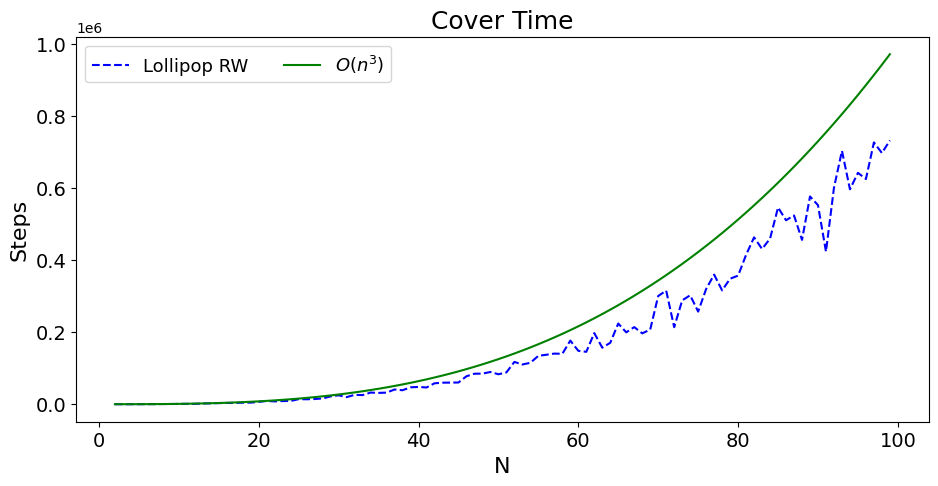

In [38]:
alphaLabelList = [r'Lollipop RW',r'$O(n^3)$']

params = {
    'font_size' : 14,
    'figsize': (11, 5),
    'plot_title' : f'Cover Time',
    'x_label' : 'N',
    'y_label' : "Steps",
    'legend_labels' : alphaLabelList,
    'legend_loc': "best",
    # 'legend_title' : r'$\alpha$',
    'legend_ncol' : 3,
    'color_list' : ['#0000FF', '#008000', '#525252'],
    'line_style_list' : ['--', '-','-.' ],
    # 'save_path' : f'Output/OrientedDynamics/orientedDynamics_N{N}_NWALKS{len(alphaList)}_Alphas{str([round(a, 2) for a in alphaList]).replace(", ", "-").replace("[", "").replace("]", "")}_TMAX{round(t)}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 7,
    # 'y_num_ticks' : 7,
    # 'x_round_val' : 1,
    # 'y_round_val' : 3,
}

plot_qwak(x_value_matrix = [list(n_range),list(n_range)] , y_value_matrix = [cover_times_random_walk_lollipop,estimate_lollipop_cover_time],**params)